In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

In [14]:
data =pd.read_csv('k_means_data.csv')

In [15]:
x=np.array(data.iloc[:,0])
y=np.array(data.iloc[:,1])
data.shape

(300, 2)

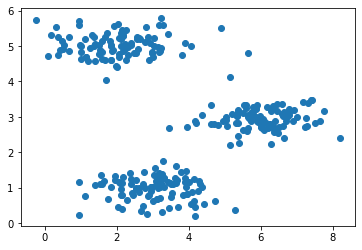

In [16]:
plt.scatter(x, y)
plt.show()

In [17]:
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)

    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist01 = (X.iloc[i,:] - centroids[j,:])**2
            dist = np.sum(dist01)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j

    return idx

In [18]:
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
initial_centroids[1,:]
idx = find_closest_centroids(data, initial_centroids)

In [19]:
#这一段要好好理解
def compute_centroids(X, idx, k):
    X = np.matrix(X)
    m, n = X.shape
    centroids = np.zeros((k, n))

    for i in range(k):
        indices = np.array(np.where(idx == i))   #这里用于索引每个数据所属于的聚类中心
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / indices.shape[1])

    return centroids

In [20]:
compute_centroids(data, idx, 3)

array([[2.42830141, 3.15792457],
       [5.81350291, 2.63365641],
       [7.1194    , 3.6167    ]])

In [21]:
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids

    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)

    return idx, centroids

In [22]:

idx, centroids = run_k_means(data, initial_centroids, 50)
idx

array([0., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [23]:
a=np.where(idx == 0)[0]
b=np.where(idx == 1)[0]
c=np.where(idx == 2)[0]
a


array([  0,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 299], dtype=int64)

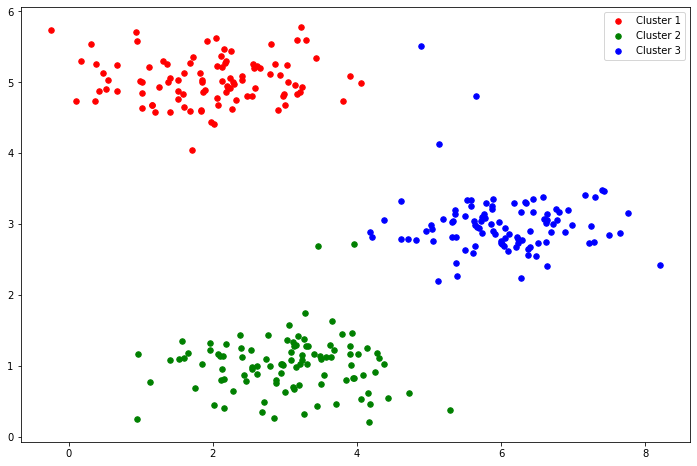

In [24]:
#可视化代码是抄的
cluster1 = data.iloc[a,:]
cluster2 = data.iloc[b,:]
cluster3 = data.iloc[c,:]
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(np.array(cluster1.iloc[:,0]), np.array(cluster1.iloc[:,1]), s=30, color='r', label='Cluster 1')
ax.scatter(np.array(cluster2.iloc[:,0]), np.array(cluster2.iloc[:,1]), s=30, color='g', label='Cluster 2')
ax.scatter(np.array(cluster3.iloc[:,0]), np.array(cluster3.iloc[:,1]), s=30, color='b', label='Cluster 3')
ax.legend()
plt.show()